## exe1) 유방암 양성/음성 여부 판단을 위한 모델 선정

In [54]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# 악성종양(malignant) - 0, 양성종양(benign) - 1

In [55]:
data = breast_cancer_data['data']
target = breast_cancer_data['target']

In [56]:
import pandas as pd

columns_names = breast_cancer_data['feature_names']
df = pd.DataFrame(data, columns=columns_names)
df['target'] = target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [126]:
df.corr()['target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [ ]:
'''
(상관계수)
타겟 변수와 각 변수마다 상관계수를 확인해보면 음의 값이 많은 것을 확인할 수 있다.
반면 양의 값을 가진 변수는 모두 0.1 이하로 타겟과 별 관계가 없어보인다.
(mean fractal dimension, texture error, smoothness error, symmetry error)
'''

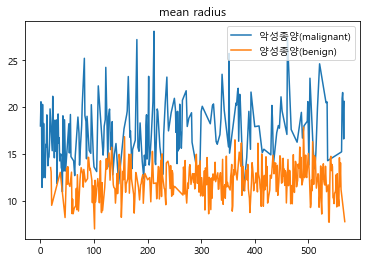

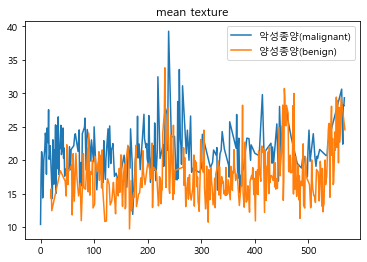

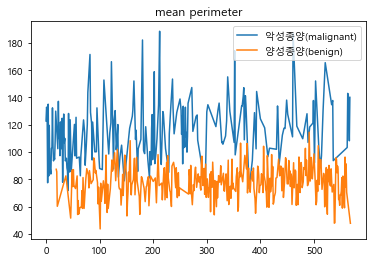

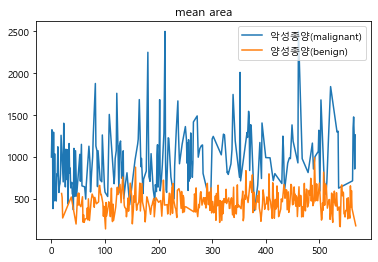

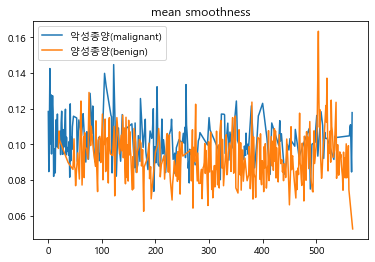

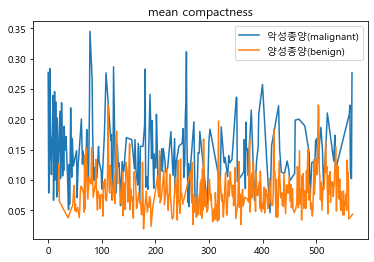

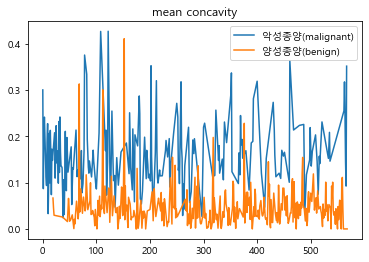

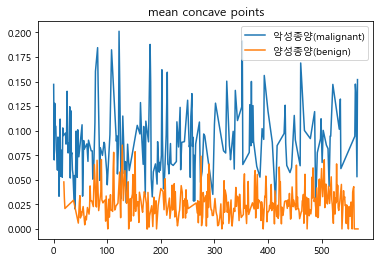

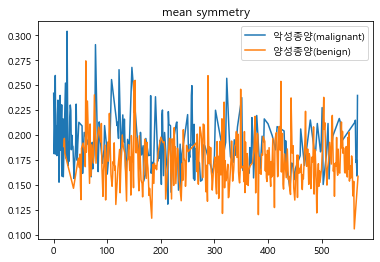

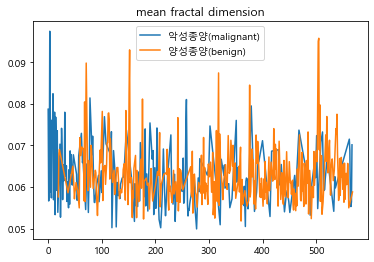

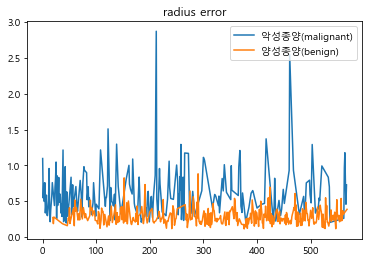

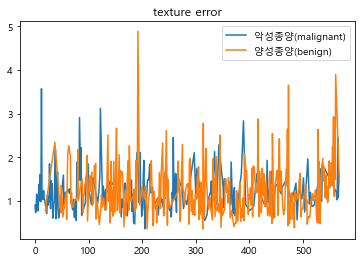

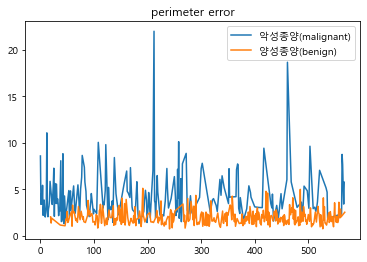

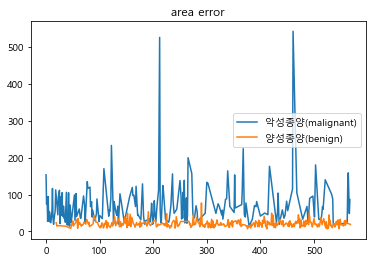

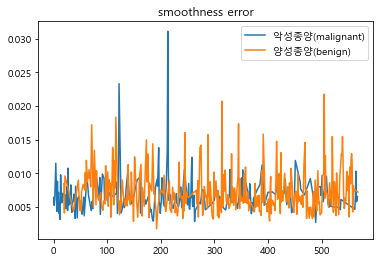

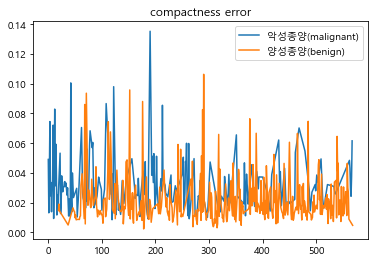

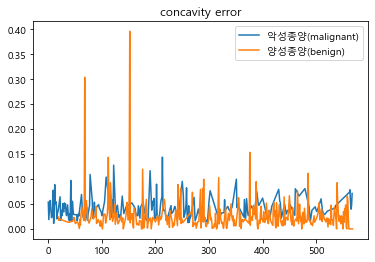

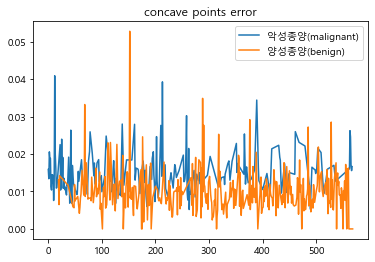

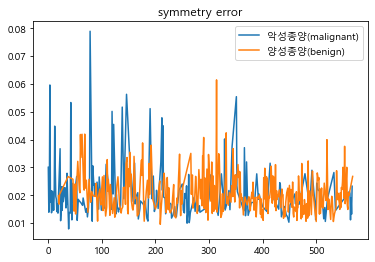

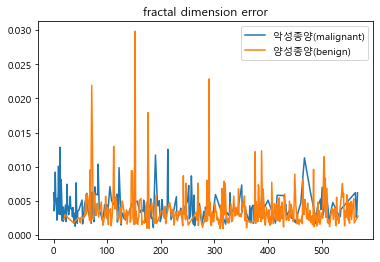

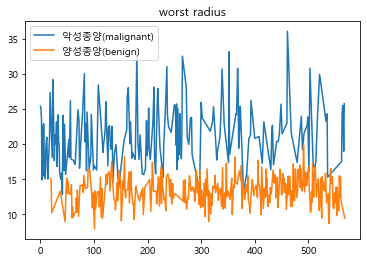

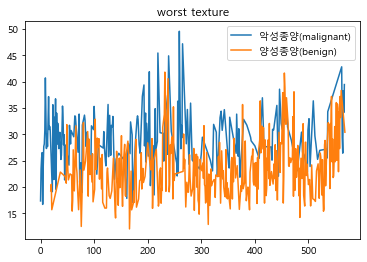

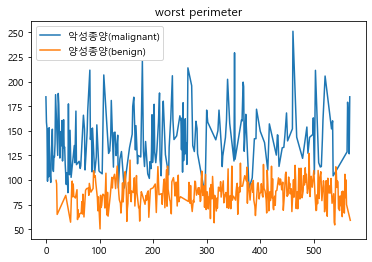

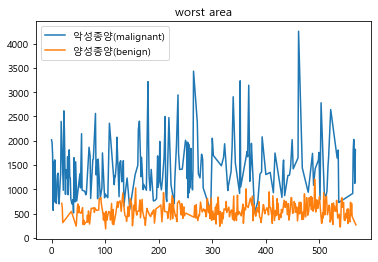

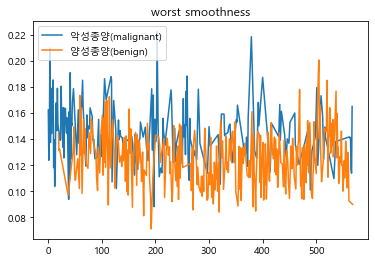

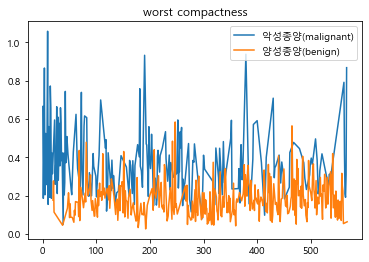

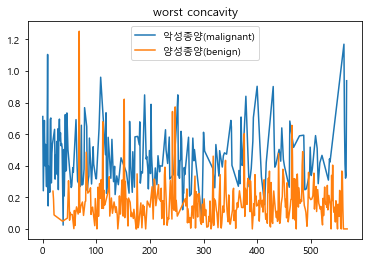

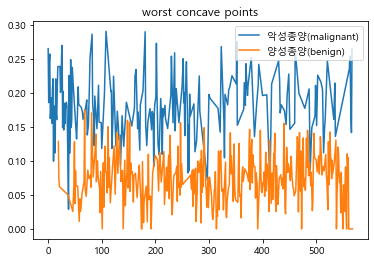

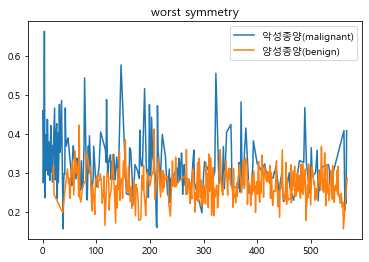

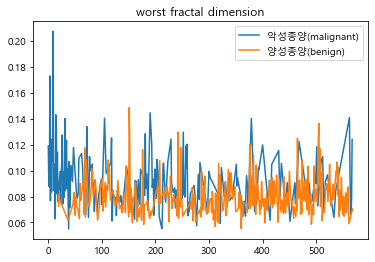

In [129]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

for colnm in breast_cancer_data['feature_names'] :
    plt.rc('font', family = 'Malgun Gothic', size = 10)
    plt.title(colnm)
    plt.plot(df_0[colnm], label = '악성종양(malignant)')
    plt.plot(df_1[colnm], label = '양성종양(benign)')
    plt.legend()
    plt.show()

In [ ]:
'''
(그래프)
상관계수가 대부분 음의 값이 나타난 것에서 볼 수 있듯이 타겟과 반비례 관계이다.
각 변수의 수치가 클수록 악성종양인 것을 확인할 수 있고 상관관계가 클수록 곂치지 않고
분류가 더 잘 되어 있는 것을 확인할 수 있다.

또한, 양성종양에 비해 악성종양의 수치 폭이 대부분 넓은 것을 확인할 수 있다.
'''

In [137]:
df2 = df[df.columns.difference(['mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error'])]
data2 = df2.to_numpy()

In [138]:
# 데이터 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data2, target, random_state=111, stratify = target)

print(train_data.shape, train_target.shape)
print(test_data.shape, test_target.shape)

(426, 27) (426,)
(143, 27) (143,)


In [139]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_data)

train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

## 1. 로지스틱회귀분류

In [140]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_scaled, train_target)

print(lg.score(train_scaled, train_target))
print(lg.score(test_scaled, test_target))

1.0
1.0


In [123]:
0.986-0.965

0.02100000000000002

In [66]:
print(lg.coef_, lg.intercept_)

[[-0.35560057 -0.51248968 -0.37326962 -0.43454981 -0.16005262  0.51172113
  -0.82786375 -0.8326676  -0.06268952  0.23262479 -1.21222969  0.28070267
  -0.58708505 -0.9147054  -0.18099022  0.82280057  0.15530617 -0.3834916
   0.37344725  0.48465373 -0.98528228 -1.3019862  -0.83169852 -0.94753992
  -0.23263781  0.00705405 -0.69744126 -0.91883359 -0.76880057 -0.6469725 ]] [-0.08070149]


## 2. 결정트리

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) 
print(dt.score(test_scaled, test_target))

1.0
0.9300699300699301


In [75]:
print(dt.feature_importances_)

[0.         0.05966357 0.         0.         0.         0.00501731
 0.         0.         0.         0.         0.         0.
 0.00975399 0.002309   0.00188441 0.         0.0133795  0.00752597
 0.         0.         0.00767354 0.02755324 0.         0.71429794
 0.         0.         0.01497592 0.12793791 0.0080277  0.        ]


In [141]:
dt2 = DecisionTreeClassifier(max_depth=1)

dt2.fit(train_scaled, train_target)

print(dt2.score(train_scaled, train_target)) 
print(dt2.score(test_scaled, test_target))

1.0
1.0


In [ ]:
'''
max_depth=5 인 경우 train score = 0.988, test score = 0.937 (0.051)
max_depth=3 인 경우 train score = 0.969, test score = 0.930 (0.039) 
max_depth=1 인 경우 train score = 0.927, test score = 0.902 (0.025)
'''

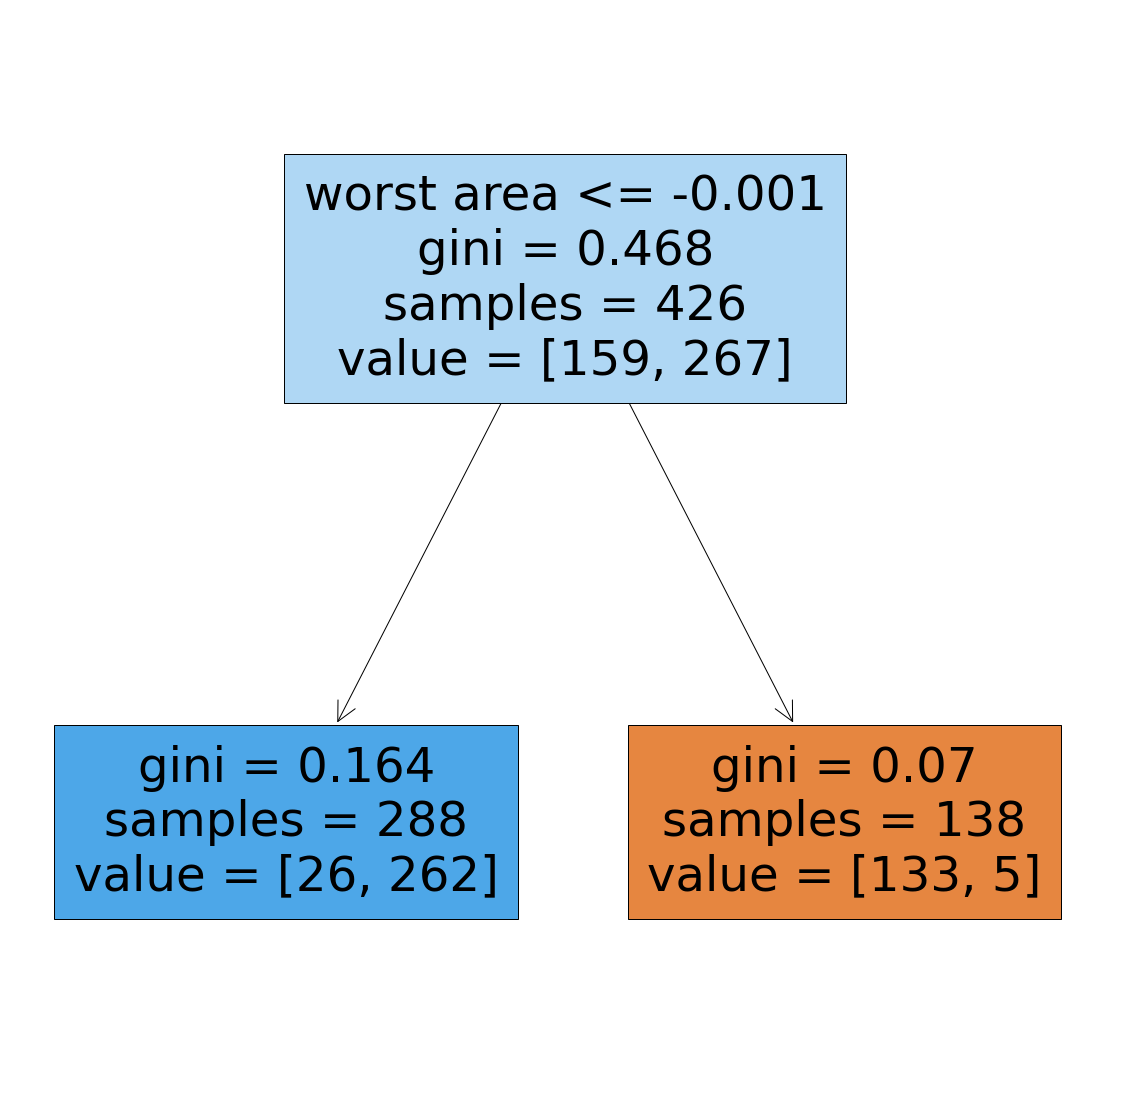

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt2, filled=True,
               feature_names=breast_cancer_data['feature_names'])
plt.show()

## 3. 랜덤포레스트

In [142]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 클래스(모델)생성
rf = RandomForestClassifier(n_jobs=-1, random_state=111)

# 교차검증
scores = cross_validate(rf, train_data, train_target,
                        return_train_score=True, n_jobs=-1)

# 최종 훈련 평가결과, 검증결과
print(scores)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 1.0   0.948372093023256

rf.fit(train_data, train_target)

# 특성중요도
print(rf.feature_importances_)

{'fit_time': array([0.17014194, 0.17006421, 0.18207788, 0.17406845, 0.17006516]), 'score_time': array([0.02088118, 0.01996756, 0.01991558, 0.0209434 , 0.02096462]), 'test_score': array([1., 1., 1., 1., 1.]), 'train_score': array([1., 1., 1., 1., 1.])}
1.0 1.0
[0.01076117 0.00170531 0.00289193 0.0021158  0.00160607 0.03314747
 0.01326345 0.07506498 0.02369538 0.0259528  0.01435829 0.00284165
 0.00320608 0.00637583 0.02153893 0.01243781 0.25764984 0.1121691
 0.00639441 0.11302516 0.01131323 0.00192477 0.14503095 0.08233517
 0.00567523 0.00385985 0.00965934]


## 4. 엑스트라트리

In [143]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=111)

scores = cross_validate(et, train_data, train_target,
                        return_train_score=True, n_jobs=-1)

print(scores)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 1.0  0.9530506155950753

et.fit(train_data, train_target)

print(et.feature_importances_)

{'fit_time': array([0.10073137, 0.09873605, 0.09773874, 0.15611362, 0.15313101]), 'score_time': array([0.01795125, 0.01795149, 0.01795149, 0.02094364, 0.02093458]), 'test_score': array([1., 1., 1., 1., 1.]), 'train_score': array([1., 1., 1., 1., 1.])}
1.0 1.0
[0.01840759 0.00597812 0.00295687 0.00219637 0.00247393 0.05402631
 0.01594166 0.05403612 0.03898184 0.03367201 0.04159344 0.00481498
 0.00330857 0.00811583 0.00802287 0.01509892 0.42210476 0.05242736
 0.02120848 0.0403271  0.02805229 0.00378704 0.06050122 0.04083836
 0.00633525 0.00423394 0.01055878]


## 5. 그레디언트 부스팅

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=111)
scores = cross_validate(gb, train_data, train_target,
                        return_train_score=True, n_jobs=-1)

print(scores)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 1.0   0.962435020519836

gb.fit(train_data, train_target)

print(et.feature_importances_)

{'fit_time': array([0.12112117, 0.12154889, 0.11955452, 0.12056446, 0.12159443]), 'score_time': array([0.00099707, 0.00099754, 0.        , 0.        , 0.00095129]), 'test_score': array([1., 1., 1., 1., 1.]), 'train_score': array([1., 1., 1., 1., 1.])}
1.0 1.0
[0.01840759 0.00597812 0.00295687 0.00219637 0.00247393 0.05402631
 0.01594166 0.05403612 0.03898184 0.03367201 0.04159344 0.00481498
 0.00330857 0.00811583 0.00802287 0.01509892 0.42210476 0.05242736
 0.02120848 0.0403271  0.02805229 0.00378704 0.06050122 0.04083836
 0.00633525 0.00423394 0.01055878]


## 6. 히스토그램 기반 그레디언트 부스팅

In [144]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=111)
scores = cross_validate(hgb, train_data, train_target,
                        return_train_score=True, n_jobs=-1)

print(scores)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 1.0    0.962407660738714

hgb.fit(train_data, train_target)

hgb.score(test_data, test_target)

{'fit_time': array([0.10471797, 0.10272336, 0.09574366, 0.10172772, 0.09474564]), 'score_time': array([0.00099707, 0.00199461, 0.00199461, 0.00199461, 0.0009973 ]), 'test_score': array([1., 1., 1., 1., 1.]), 'train_score': array([1., 1., 1., 1., 1.])}
1.0 1.0


1.0

## 7. 확률적경사하강법

In [103]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', random_state=111)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9859154929577465
0.958041958041958


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


훈련 정확도 리스트 개수 =  100
테스트 정확도 리스트 개수 =  100


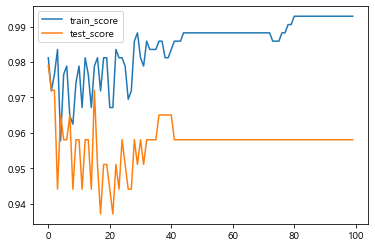

In [130]:
# 에포크 반복 횟수 조정
so = SGDClassifier(loss='log_loss', random_state=111)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

for i in range(0,100) :
    so.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(so.score(train_scaled, train_target))
    test_score.append(so.score(test_scaled, test_target))
    
# 정확도 리스트 개수 확인
print('훈련 정확도 리스트 개수 = ', len(train_score))
print('테스트 정확도 리스트 개수 = ', len(test_score))


# 최적의 에포크 위치 확인 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

In [146]:
sc = SGDClassifier(loss='log_loss', max_iter=70, tol=None, random_state=111)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))   
print(sc.score(test_scaled, test_target)) 

1.0
1.0


In [ ]:
'''
다른 모델에 비해
로지스틱회귀분류 모델에서 과대/소적합 발생이 가장 적고 
일반화가 잘 적용되어 있는 것으로 나타났다. (훈련정확도와 테스트정확도 차이 : 0.021)
(train score 0.986, test score 0.965)

결정트리(max_depth=1)도 다른 모델들에 비해 
과대/소적합 발생이 적게 나타났다.(훈련정확도와 테스트정확도 차이 : 0.025)
(train score 0.927, test score 0.902)

하지만 전체적인 정확도가 로지스틱회귀분류 모델에서 훨씬 높게 나타나 
유방암 판정 모델로 가장 적합하다고 판단된다.
'''

In [ ]:
'''
(상관계수)
타겟 변수와 각 변수마다 상관계수를 확인해보면 음의 값이 많은 것을 확인할 수 있다.
반면 양의 값을 가진 변수는 모두 0.1 이하로 타겟과 별 관계가 없어보인다.
(mean fractal dimension, texture error, smoothness error, symmetry error)

또한, 유방암 판별모델 생성 시 상관계수를 확인하여 
별 관계가 없는 위 4개의 변수를 제외하고 모델 수행할 시 
로지스틱회귀분류뿐만 다른 모델 모두 
정확도가 훈련/테스트 각 1.0, 1.0로 모델 정확도가 증가한 것을 확인할 수 있다.
'''